In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bioinfokit.analys import stat
import plotly as py
import plotly_express as px

In [2]:
rent = pd.read_csv('Data/rent_data/rent_data_detail.csv')
rent.head()

,property_id,prop_type,list_date,last_update,year_built,beds,baths_full,price,baths,photo_count,...,state_code,county,lat,lon,neighborhood_name,buiding_size(sqft),status,lot_size(sqft),brand_name,broker_name
0,R9220820530,condo,2020-08-20T21:07:02.000Z,2020-09-16T13:46:59.000Z,1900.0,2,1.0,1750.0,1.0,13,...,PA,Philadelphia,39.952610,-75.175750,Rittenhouse,863.0,Active,0,BHHS Fox & Roach At the Harper Rittenhouse Square,Berkshire Hathaway HomeServices
1,R9722862130,condo,2020-09-16T17:15:26.000Z,2020-09-16T13:12:24.000Z,1960.0,0,1.0,1250.0,1.0,13,...,PA,Philadelphia,39.928213,-75.150469,Pennsport,3120.0,Active,0,By Real Estate,NaN
2,R9175211338,townhome,2020-09-13T02:05:48.000Z,2020-09-14T21:30:22.000Z,1925.0,1,1.0,1050.0,1.0,13,...,PA,Philadelphia,40.010798,-75.160560,Tioga,772.0,Active,0,United Real Estate - Philadelphia,NaN
3,R4647948039,condo,2020-09-10T20:09:38.000Z,2020-09-12T10:18:11.000Z,1900.0,2,2.0,2800.0,2.0,13,...,PA,Philadelphia,39.948597,-75.165901,Center City,1272.0,Active,0,Keller Williams Philadelphia,NaN
4,R4651413772,condo,2020-09-10T19:59:13.000Z,2020-09-12T10:12:10.000Z,1900.0,1,1.0,2100.0,2.0,13,...,PA,Philadelphia,39.948597,-75.165901,Center City,962.0,Active,0,Keller Williams Philadelphia,NaN


### 1-One Sample t-test for the Average Rent House Price

- We know the average rent price is $1652 in Philadelphia on February 2020 
  (source link: https://www.rentcafe.com/blog/rental-market/local-rent-reports/pennsylvania-rent-report-february-2020/#:~:text=Apartments%20in%20Philadelphia%20and%20Pittsburgh,(%245)%20compared%20to%20January)


- Null hypotheses: the average rent price during the Covid-19 is equal to the average rent price before Covid-19 which is on February  
  Alternative hypotheses: the average rent price during the Covid-19 is not equal to the average rent price before Covid-19 which is on February 


- We choose 5% significant level

In [3]:
# credit to https://reneshbedre.github.io/blog/ttest.html
res = stat()
res.ttest(df=rent, test_type=1, res='price', mu=1652)
print(res.summary)


One Sample t-test 

------------------  -------------
Sample size           55
Mean                3778.38
t                      7.17558
Df                    54
P-value (one-tail)     1.0683e-09
P-value (two-tail)     2.1366e-09
Lower 95.0%         3184.26
Upper 95.0%         4372.5
------------------  -------------


**Interpretation**: becasue p-value(two-tail) is less than 0.05, we reject the Null hypotheses and conclude that the data provide convicing evidence of a difference between average rent price during the Covid-19 and before it.

### 2-Rent House Distribution in Different Region

In [58]:
zip_code = pd.DataFrame(rent['postal_code'].value_counts()).reset_index().iloc[:32,]
zip_code

,index,postal_code
0,19103,800
1,19107,469
2,19106,389
3,19146,356
4,19121,346
5,19102,343
6,19147,334
7,19130,308
8,19123,272
9,19122,234


In [59]:
fig = px.pie(zip_code, names = 'index', values = 'postal_code')
fig.show()

- There are 48 postal codes in Philadelphia, but since the number of rent house is less than 10 for 16 of them, so I exclude those houses when making the pie chart.

- As you can see, in the region 19103 and 19107 has most of house for rent.

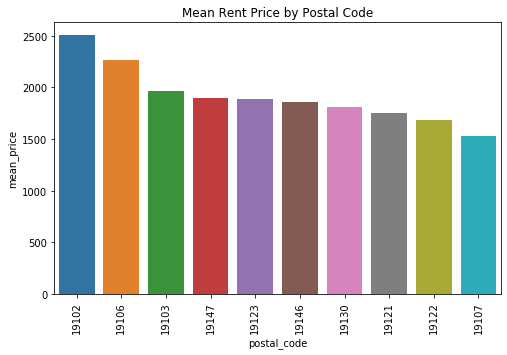

In [154]:
price_mean_by_postal = result.groupby('postal_code')['price'].mean().rename_axis('postal_code').reset_index(name='mean_price').sort_values('mean_price', ascending=False)

fig, ax = plt.subplots(figsize=(8,5))
prop_type_plot = sns.barplot(x='postal_code', y='mean_price', ax=ax, data=price_mean_by_postal,
                             order=price_mean_by_postal.sort_values('mean_price', ascending=False)['postal_code'])
prop_type_plot.set_xticklabels(price_median_by_postal['postal_code'],rotation=90)
plt.title('Mean Rent Price by Postal Code')
plt.show()

- However, the mean rent price for those two region is not that expensive

### 03-Beds Distribution

In [60]:
beds = pd.DataFrame(rent['beds'].value_counts()).reset_index()
beds

,index,beds
0,1,1832
1,2,1660
2,3,849
3,0,578
4,4,267
5,5,61
6,6,23
7,7,4
8,8,2
9,9,1


In [61]:
fig = px.pie(beds, names = 'index', values = 'beds')
fig.show()

- The houses which the number of beds with 1, 2, 3, and studio have taken the dominant in the rent house matket.

### 04-Density Heatmap for the Top 10 Region with Price

In [127]:
df1 = rent[rent['postal_code'] == 19103]
df2 = rent[rent['postal_code'] == 19107]
df3 = rent[rent['postal_code'] == 19106]
df4 = rent[rent['postal_code'] == 19146]
df5 = rent[rent['postal_code'] == 19121]
df6 = rent[rent['postal_code'] == 19102]
df7 = rent[rent['postal_code'] == 19147]
df8 = rent[rent['postal_code'] == 19130]
df9 = rent[rent['postal_code'] == 19123]
df10 = rent[rent['postal_code'] == 19122]

In [128]:
frames = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]
result = pd.concat(frames)

In [129]:
fig = px.density_heatmap(result, x ='neighborhood_name', y = 'price')
fig.show()

- Top 3 most expensive rent house are in the Center City, Rittenhouse, and Logan Square


- Most rent house price is between \\$1500-\\$1999 in the Center City